In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"data.csv")

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

<Axes: >

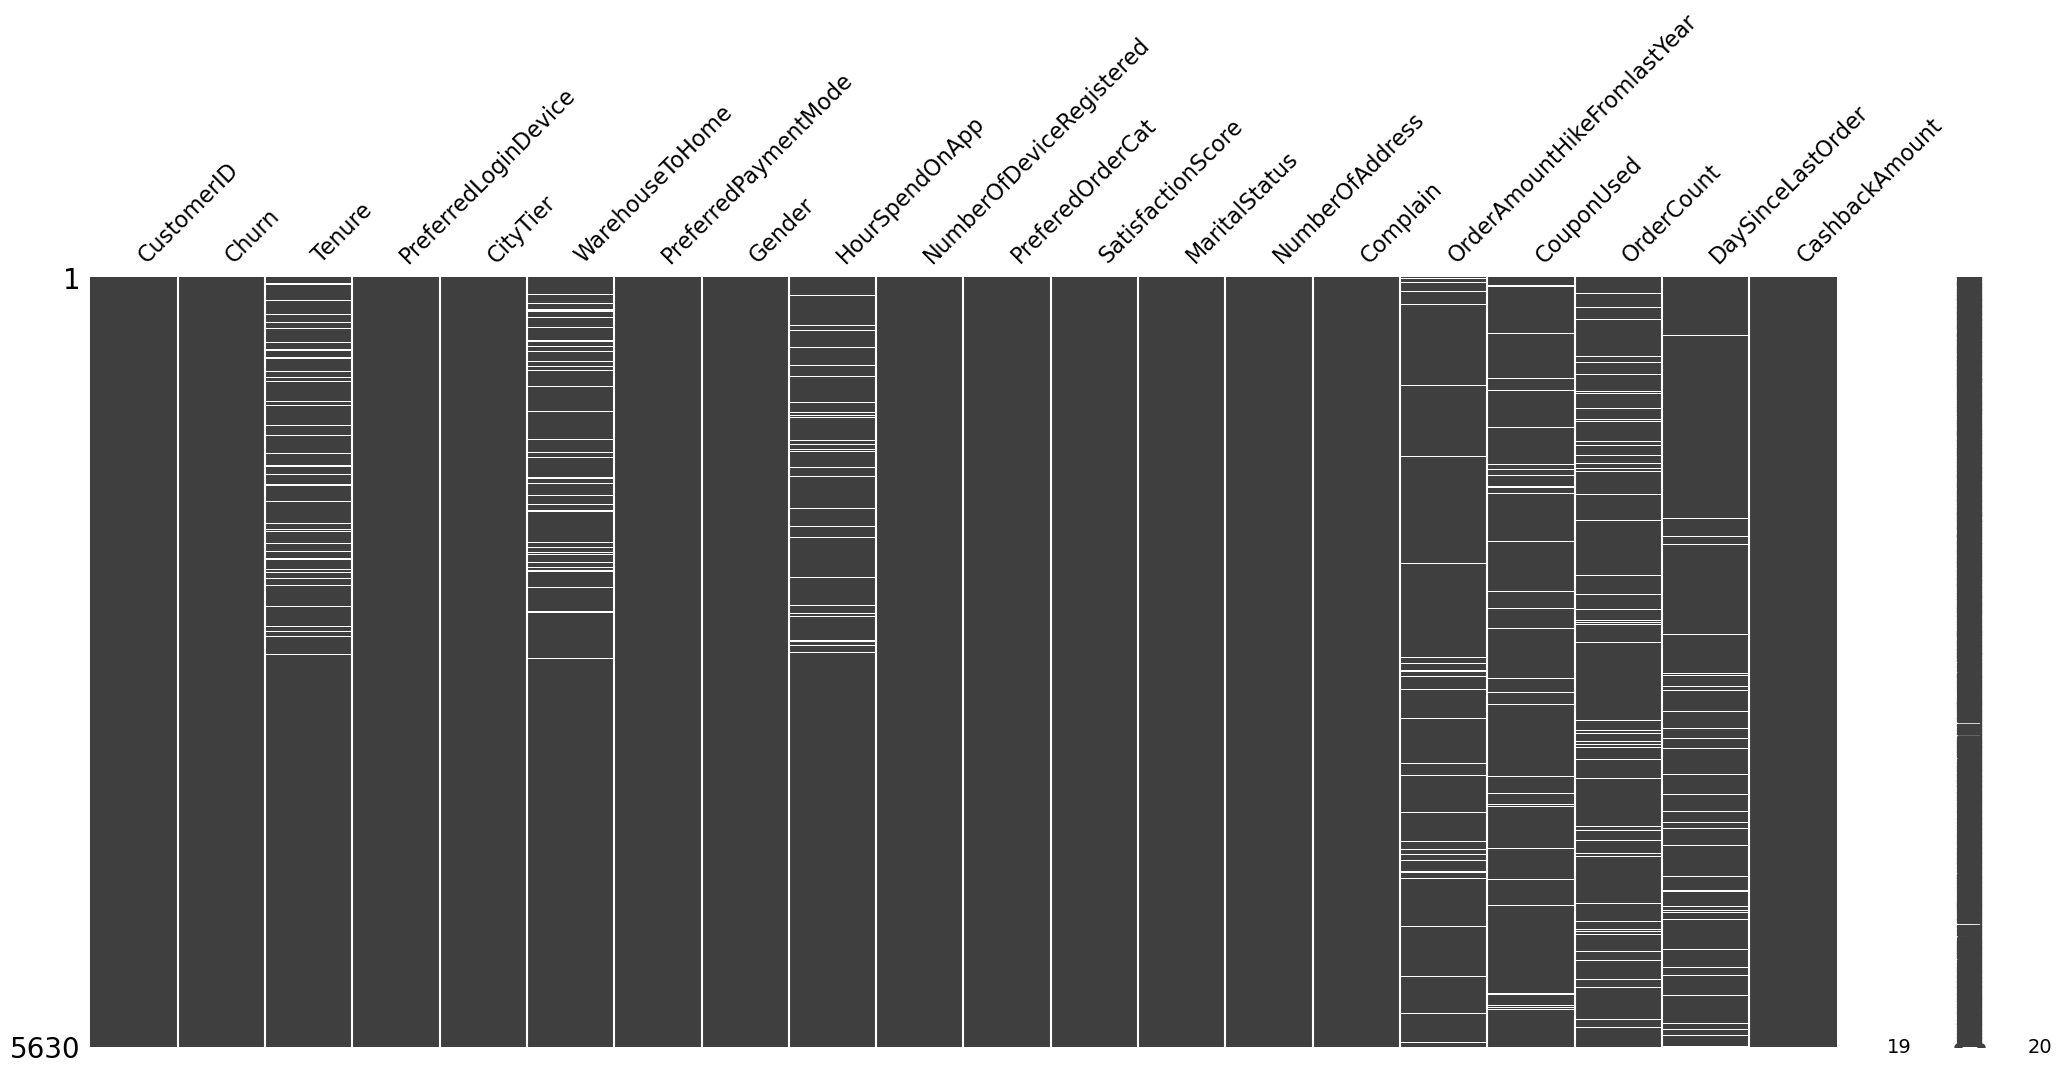

In [7]:
import missingno as msno
msno.matrix(df)

<Axes: >

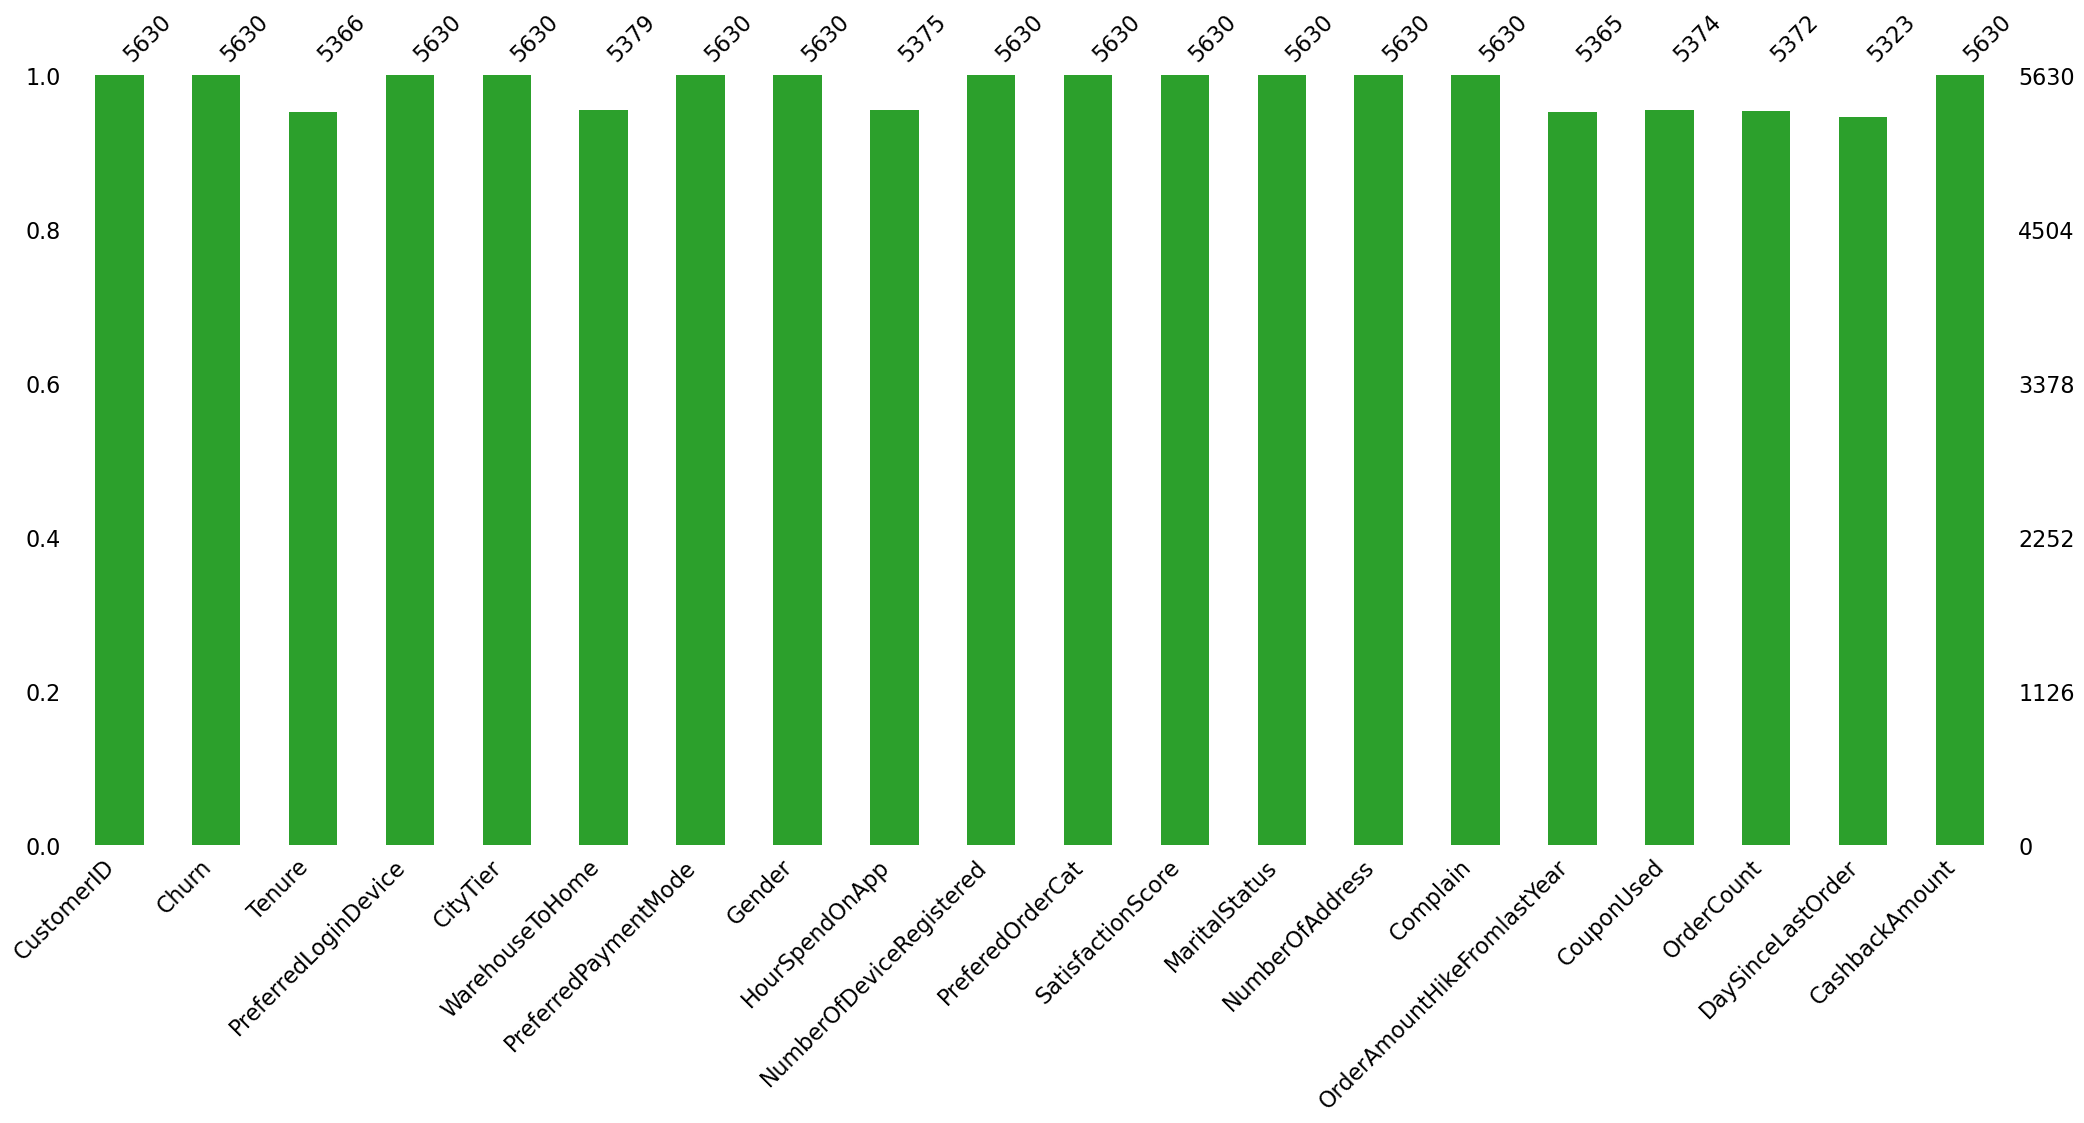

In [8]:
msno.bar(df , color="tab:green")

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tenure', ylabel='Density'>

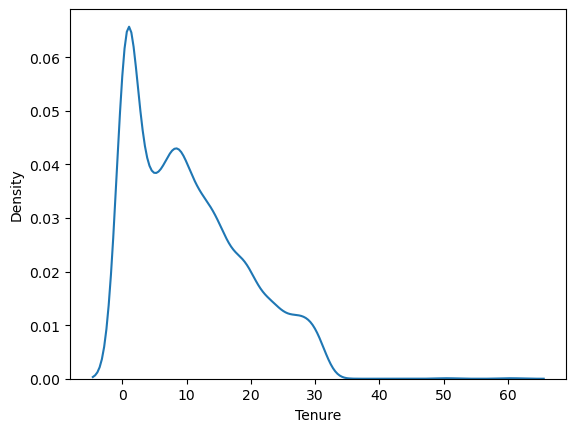

In [9]:
sns.kdeplot(df , x='Tenure')

In [10]:
# impute with bfill Method
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')

/var/folders/lm/fgskm5x57_g8ct3kp6hrxxkw0000gn/T/ipykernel_19085/4095582249.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Tenure'] = df['Tenure'].fillna(method = 'bfill')


In [11]:
df['Tenure'].isnull().sum()

0

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WarehouseToHome', ylabel='Density'>

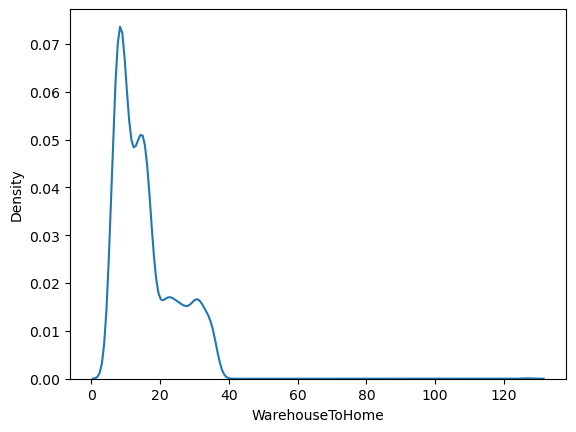

In [12]:
sns.kdeplot(df , x='WarehouseToHome')

In [13]:
# Impute with simple imputer
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WarehouseToHome', ylabel='Density'>

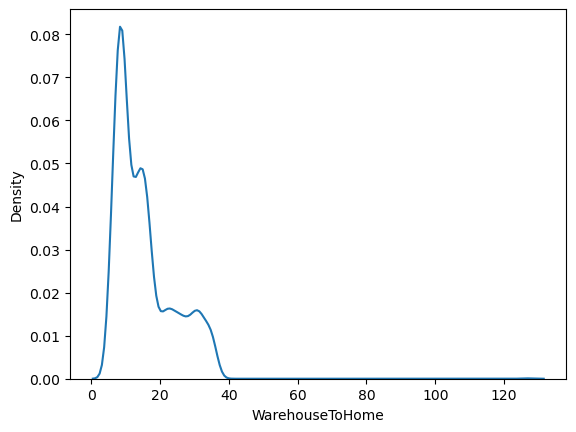

In [14]:
sns.kdeplot(df , x='WarehouseToHome')

In [15]:
df['WarehouseToHome'].isnull().sum()

0

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

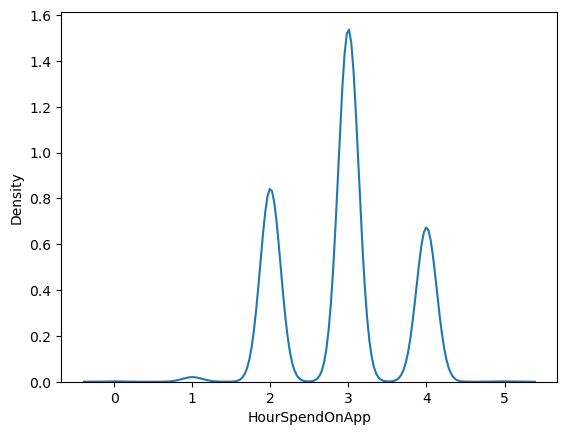

In [16]:
sns.kdeplot(df , x='HourSpendOnApp')

In [17]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

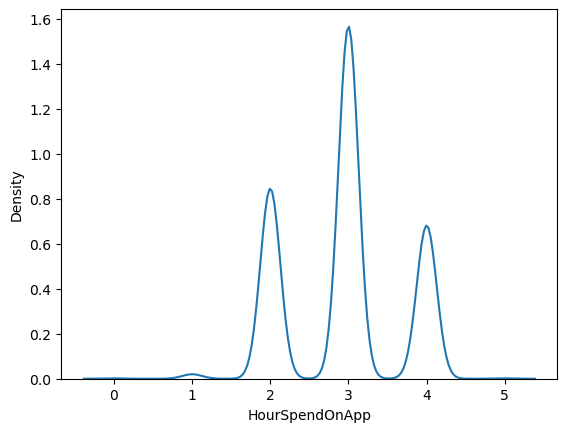

In [18]:
sns.kdeplot(df , x='HourSpendOnApp')

In [19]:
df['HourSpendOnApp'].isnull().sum()

0

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

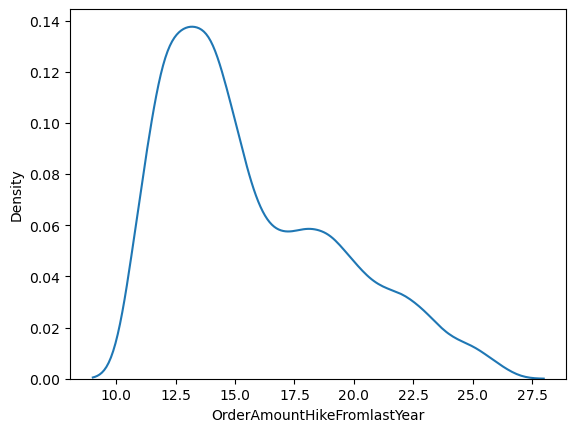

In [20]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

In [21]:
# impute with ffill method
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')

/var/folders/lm/fgskm5x57_g8ct3kp6hrxxkw0000gn/T/ipykernel_19085/1938522435.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

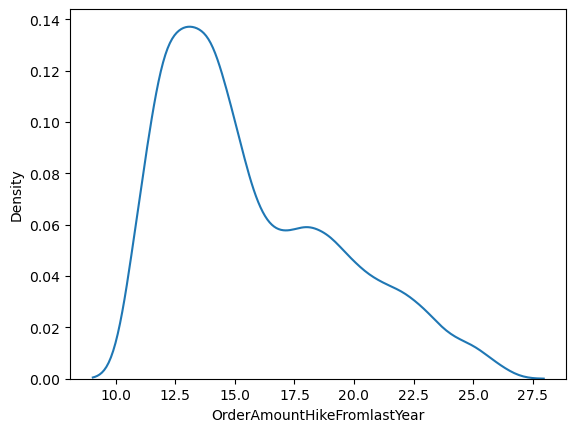

In [22]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

In [23]:
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CouponUsed', ylabel='Density'>

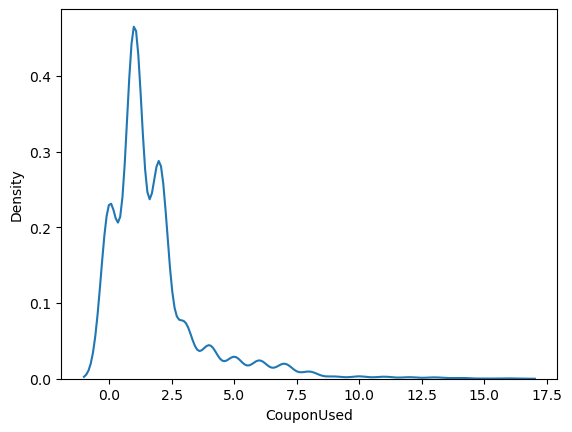

In [24]:
sns.kdeplot(df , x='CouponUsed')

In [25]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CouponUsed', ylabel='Density'>

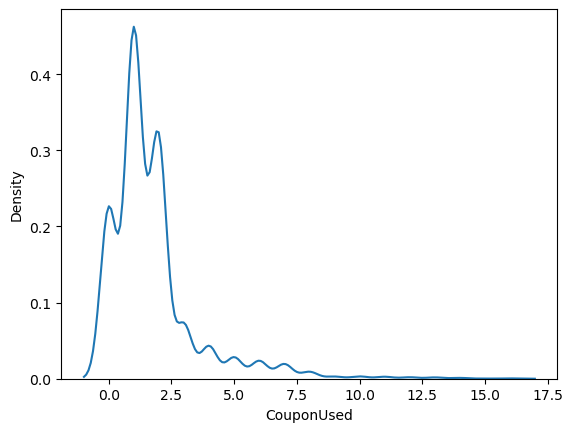

In [26]:
sns.kdeplot(df , x='CouponUsed')

In [27]:
df['CouponUsed'].isnull().sum()

0

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='OrderCount', ylabel='Density'>

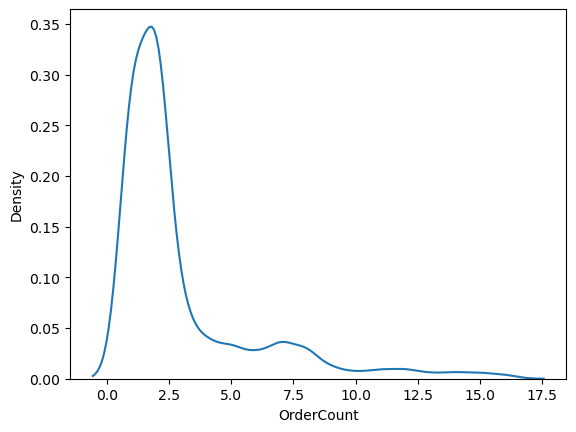

In [28]:
sns.kdeplot(df , x='OrderCount')

In [29]:
# Impute with KNN imputer
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='OrderCount', ylabel='Density'>

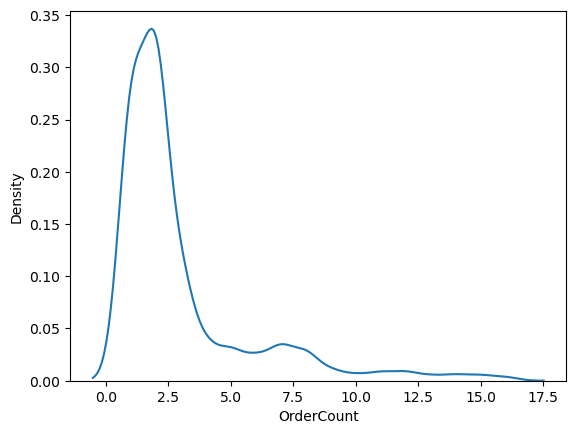

In [30]:
sns.kdeplot(df , x='OrderCount')

In [31]:
df['OrderCount'].isnull().sum()

0

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

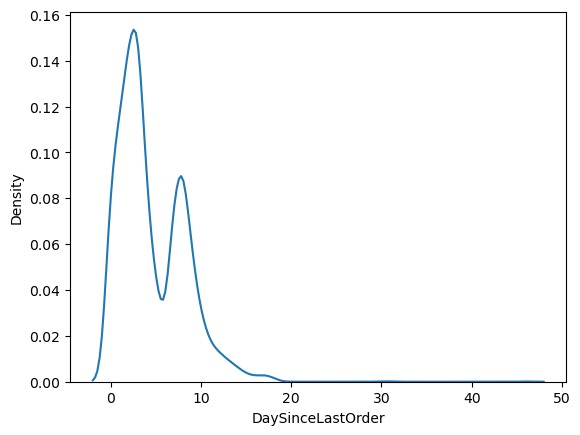

In [32]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [33]:
# impute with bfill Method
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')

/var/folders/lm/fgskm5x57_g8ct3kp6hrxxkw0000gn/T/ipykernel_19085/1527871328.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

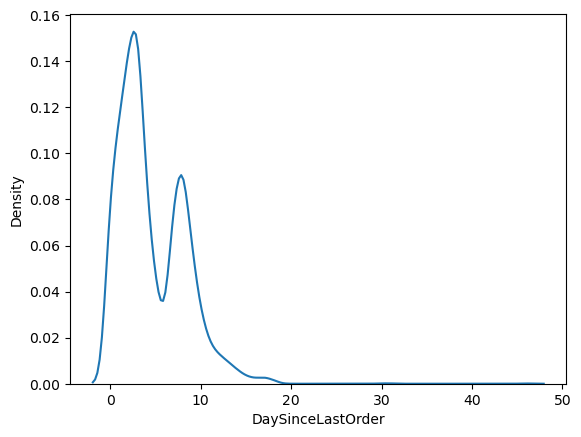

In [34]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [35]:
df['DaySinceLastOrder'].isnull().sum()

0

In [36]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [37]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:')
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [38]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120


In [39]:
print(df.columns.values)

['CustomerID' 'Churn' 'Tenure' 'PreferredLoginDevice' 'CityTier'
 'WarehouseToHome' 'PreferredPaymentMode' 'Gender' 'HourSpendOnApp'
 'NumberOfDeviceRegistered' 'PreferedOrderCat' 'SatisfactionScore'
 'MaritalStatus' 'NumberOfAddress' 'Complain'
 'OrderAmountHikeFromlastYear' 'CouponUsed' 'OrderCount'
 'DaySinceLastOrder' 'CashbackAmount']


In [40]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

Categorical:

Nominal:
CustomerID (Unique customer ID)
Churn (Churn Flag)
PreferredLoginDevice (Preferred login device of customer)
PreferredPaymentMode (Preferred payment method of customer)
Gender (Gender of customer)
PreferedOrderCat (Preferred order category of customer in last month)
MaritalStatus (Marital status of customer)
Complain (Any complaint has been raised in last month)

Ordinal:
CityTier (City tier)
SatisfactionScore

Numerical:

Discrete:

NumberOfDeviceRegistered (Total number of devices registered by a particular customer)
NumberOfAddress (Total number of addresses added by a particular customer)
CouponUsed (Total number of coupons used in last month)
OrderCount (Total number of orders placed in last month)
DaySinceLastOrder (Days since last order by customer)

Continuous:

Tenure (Tenure of customer in organization)
WarehouseToHome (Distance in between warehouse to home of customer)
HourSpendOnApp (Number of hours spent on mobile application or website)
OrderAmountHikeFromlastYear (Percentage increase in order from last year)
CashbackAmount (Average cashback in last month)

In [41]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.0,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [42]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.169627,1.654707,15.343872,2.934103,3.688988,3.066785,4.214032,0.284902,15.731972,1.751023,3.008004,4.580639,177.221492
std,1625.385339,0.374240,8.563153,0.915389,8.450963,0.719812,1.023999,1.380194,2.583586,0.451408,3.689411,1.851038,2.871521,3.638313,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.008004,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


Observations:

1. Churn Rate is approx 17%
2. Avg tenure is approx 10 months
3. Max tenure of a customer is 61 months

In [43]:
df.describe(include=['O'])

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [44]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [45]:
df.shape

(5630, 20)

In [46]:
df[['PreferredLoginDevice', 'Churn']].groupby(['PreferredLoginDevice'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,PreferredLoginDevice,Churn
2,Phone,0.224208
0,Computer,0.198286
1,Mobile Phone,0.125859


In [47]:
df[['CityTier', 'Churn']].groupby(['CityTier'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,CityTier,Churn
2,3,0.213705
1,2,0.198347
0,1,0.145117


In [48]:
df[['PreferredPaymentMode', 'Churn']].groupby(['PreferredPaymentMode'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,PreferredPaymentMode,Churn
1,COD,0.287671
5,E wallet,0.228013
0,CC,0.216117
6,UPI,0.173913
2,Cash on Delivery,0.154362
4,Debit Card,0.153846
3,Credit Card,0.128581


In [49]:
df[['Gender', 'Churn']].groupby(['Gender'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,Gender,Churn
1,Male,0.177305
0,Female,0.154942


In [50]:
df[['NumberOfDeviceRegistered', 'Churn']].groupby(['NumberOfDeviceRegistered'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,NumberOfDeviceRegistered,Churn
5,6,0.345679
4,5,0.224745
3,4,0.164914
2,3,0.149500
1,2,0.094203
0,1,0.093617


In [51]:
df[['PreferedOrderCat', 'Churn']].groupby(['PreferedOrderCat'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,PreferedOrderCat,Churn
4,Mobile Phone,0.275374
3,Mobile,0.271941
0,Fashion,0.154964
2,Laptop & Accessory,0.102439
5,Others,0.075758
1,Grocery,0.048780


In [52]:
df[['SatisfactionScore', 'Churn']].groupby(['SatisfactionScore'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,SatisfactionScore,Churn
4,5,0.238267
2,3,0.171967
3,4,0.171322
1,2,0.126280
0,1,0.115120


In [53]:
df[['MaritalStatus', 'Churn']].groupby(['MaritalStatus'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,MaritalStatus,Churn
2,Single,0.267261
0,Divorced,0.146226
1,Married,0.115204


In [54]:
df[['Complain', 'Churn']].groupby(['Complain'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,Complain,Churn
1,1,0.316708
0,0,0.109290


In [55]:
df[['NumberOfAddress', 'Churn']].groupby(['NumberOfAddress'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,NumberOfAddress,Churn
11,19,1.000000
12,20,1.000000
6,7,0.250000
7,8,0.235714
10,11,0.234694
8,9,0.192469
9,10,0.180412
2,3,0.178404
1,2,0.176041
5,6,0.172775


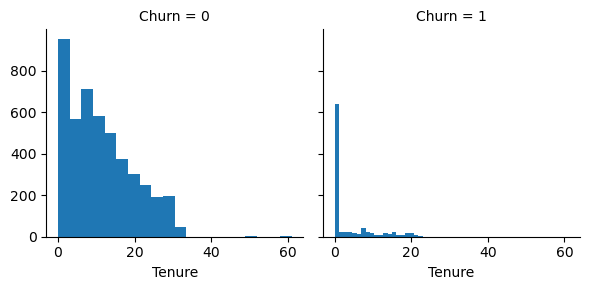

In [56]:
g = sns.FacetGrid(df, col='Churn')
g.map(plt.hist, 'Tenure', bins=20)

In [57]:
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Mobile Phone'

tenure is negatively correlated with churn, customers who have been with the company for a longer time are less likely to churn compared to shorter tenures.

In [58]:
df.nunique()


CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       18
OrderCount                       17
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

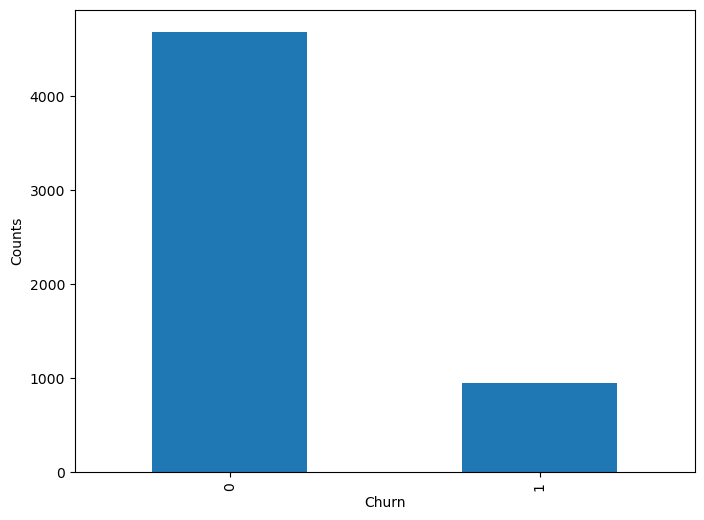

In [59]:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

The number of customers who stayed with the service is higher than those who churned, with a ratio of approximately 5 to 1. This indicates a low churn rate, which is typically expected, resulting in an imbalanced dataset.

To handle this data imbalance, we will oversample the minority class. (we can use SMOTE)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

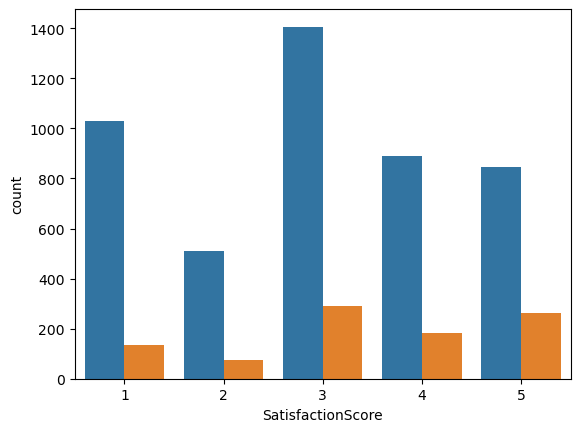

In [60]:
sns.countplot(x='SatisfactionScore', hue='Churn',  data=df)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

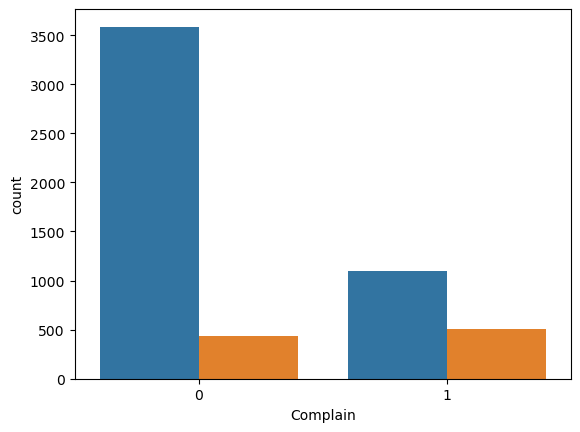

In [61]:
sns.countplot(x='Complain', hue='Churn',  data=df)
plt.title("Distribution of Complain for Churned and Retained customers")
plt.show()

churn rate for customers with complain is higher than those without

AttributeError: 'numpy.int64' object has no attribute 'startswith'

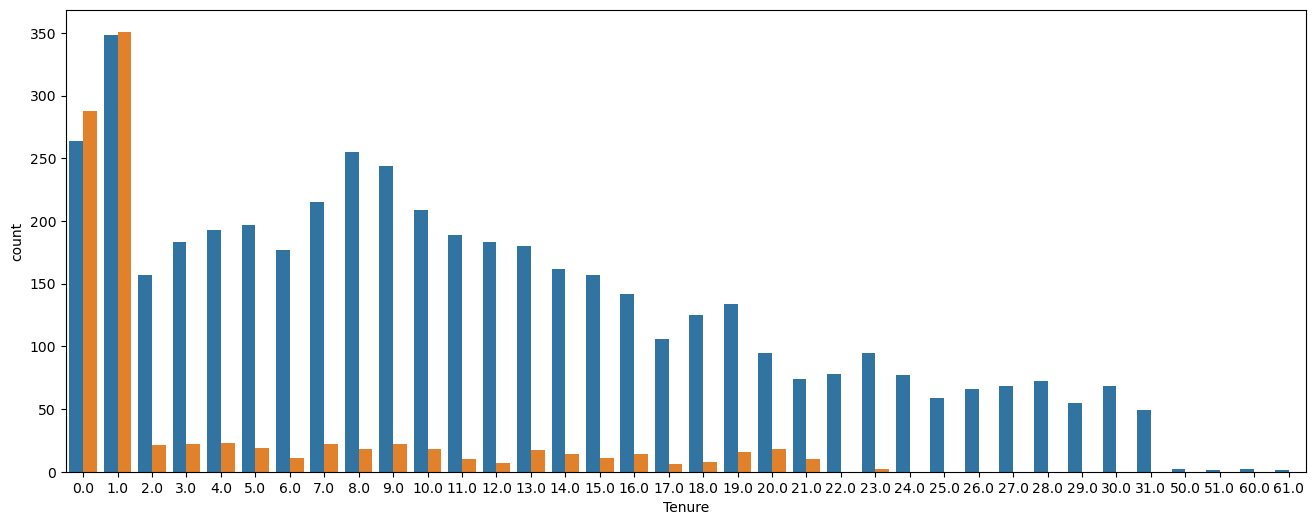

In [62]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Tenure', hue='Churn',  data=df)
plt.title("Distribution of Tenure for Churned and Retained customers")
plt.show()

customers with a lower tenure are more likely to churn

AttributeError: 'numpy.int64' object has no attribute 'startswith'

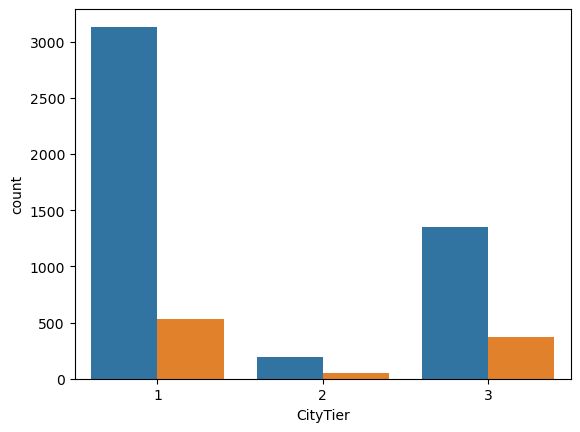

In [63]:
sns.countplot(x='CityTier', hue='Churn',  data=df)
plt.title("Distribution of CityTier for Churned and Retained customers")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

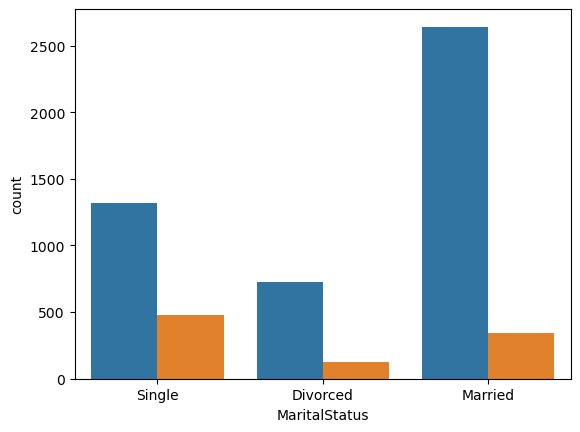

In [64]:
sns.countplot(x='MaritalStatus', hue='Churn',  data=df)
plt.title("Distribution of MaritalStatus for Churned and Retained customers")
plt.show()

In [65]:
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

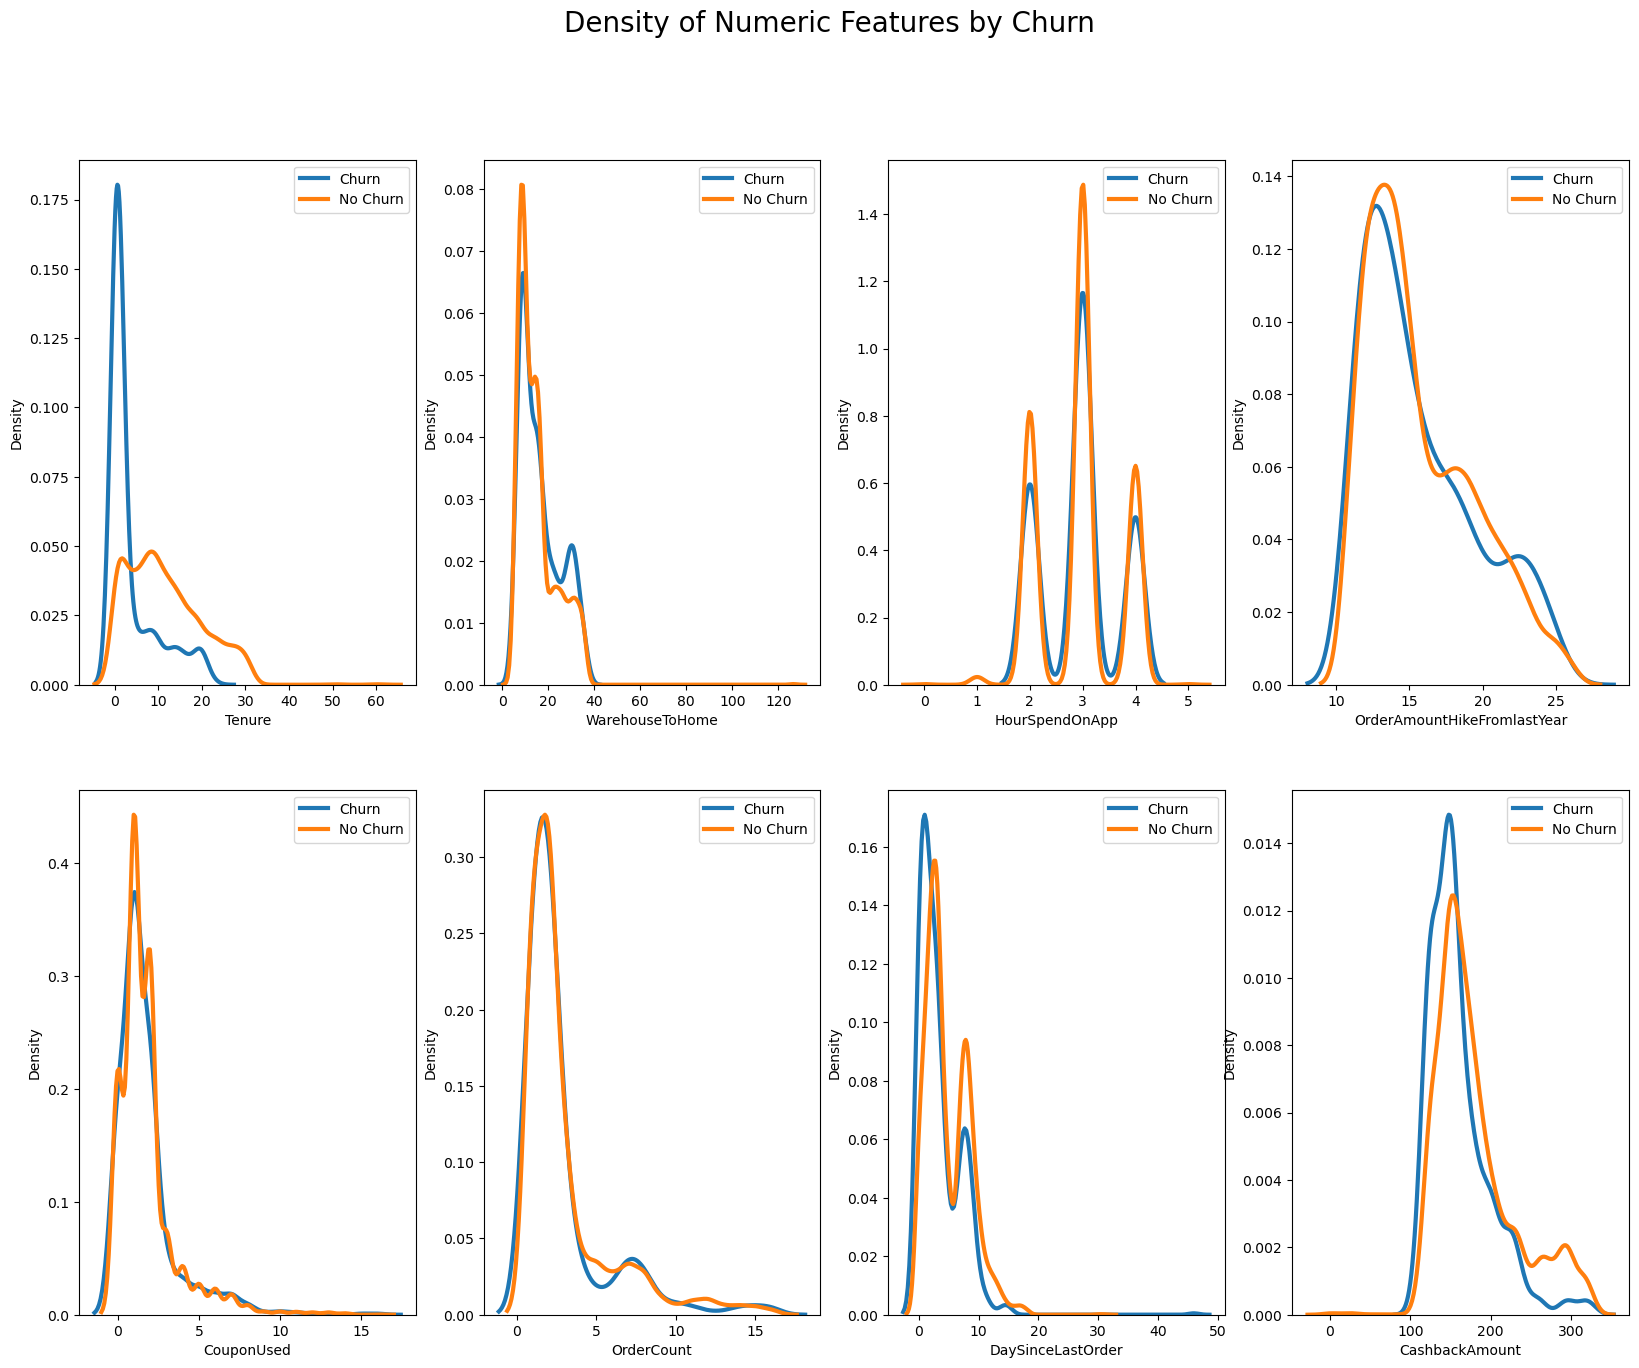

In [66]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

In [67]:
df.shape

(5630, 20)

In [68]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [69]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [70]:
dataframe=df.copy()
df1=df.copy()


In [71]:
df1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [72]:
df1.dropna(inplace=True)

In [73]:
df1.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [74]:
df1['PreferredLoginDevice'] = df1['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'})
df1['PreferredPaymentMode'] = df1['PreferredPaymentMode'].replace({'Cash on Delivery': 'COD'})
df1['PreferredPaymentMode'] = df1['PreferredPaymentMode'].replace({'CC': 'Credit Card'})


In [75]:
for i in df1.columns:
    if df1[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:')
        print(df1[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [76]:
df1.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [77]:
df1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,2.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [78]:
print(df1['PreferredLoginDevice'].unique())

['Mobile Phone' 'Computer']


In [79]:
print(df1['PreferredLoginDevice'].value_counts())

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


In [80]:
'''def dummyEncode(df):
        columnsToEncode = ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
dummyEncode(df1)'''

"def dummyEncode(df):\n        columnsToEncode = ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']\n        le = LabelEncoder()\n        for feature in columnsToEncode:\n            try:\n                df[feature] = le.fit_transform(df[feature])\n            except:\n                print('Error encoding '+feature)\n        return df\ndummyEncode(df1)"

In [81]:
from sklearn.preprocessing import OneHotEncoder

# Assuming df1 is your dataset
# cat_features should contain the categorical features you want to one-hot encode
cat_features = ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']

encoded_features = []

# Loop through each categorical feature
for feature in cat_features:
    # One-hot encode the feature
    encoded_feat = OneHotEncoder().fit_transform(df1[feature].values.reshape(-1, 1)).toarray()
    n = df1[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df1.index
    encoded_features.append(encoded_df)

# Concatenate the encoded features with df1
df1_encoded = pd.concat([df1, *encoded_features], axis=1)
df1 = df1_encoded


In [82]:
df1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferedOrderCat_2,PreferedOrderCat_3,PreferedOrderCat_4,PreferedOrderCat_5,PreferedOrderCat_6,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,Gender_1,Gender_2
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,50002,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,50003,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,2.0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [83]:
df1.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_1',
       'PreferredLoginDevice_2', 'PreferredPaymentMode_1',
       'PreferredPaymentMode_2', 'PreferredPaymentMode_3',
       'PreferredPaymentMode_4', 'PreferredPaymentMode_5',
       'PreferedOrderCat_1', 'PreferedOrderCat_2', 'PreferedOrderCat_3',
       'PreferedOrderCat_4', 'PreferedOrderCat_5', 'PreferedOrderCat_6',
       'MaritalStatus_1', 'MaritalStatus_2', 'MaritalStatus_3', 'Gender_1',
       'Gender_2'],
      dtype='object')

In [84]:
df1=df1.drop(['CustomerID','PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender'], axis=1)

In [85]:
df1.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferedOrderCat_2,PreferedOrderCat_3,PreferedOrderCat_4,PreferedOrderCat_5,PreferedOrderCat_6,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,Gender_1,Gender_2
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,0.0,1,8.0,3.0,4,3,7,1,15.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,0.0,1,30.0,2.0,4,3,6,1,14.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1,0.0,1,12.0,2.0,3,5,3,0,11.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [86]:
df1.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_1',
       'PreferredLoginDevice_2', 'PreferredPaymentMode_1',
       'PreferredPaymentMode_2', 'PreferredPaymentMode_3',
       'PreferredPaymentMode_4', 'PreferredPaymentMode_5',
       'PreferedOrderCat_1', 'PreferedOrderCat_2', 'PreferedOrderCat_3',
       'PreferedOrderCat_4', 'PreferedOrderCat_5', 'PreferedOrderCat_6',
       'MaritalStatus_1', 'MaritalStatus_2', 'MaritalStatus_3', 'Gender_1',
       'Gender_2'],
      dtype='object')

In [87]:
x=df1.drop(['Churn'],axis=1)
y=df1['Churn']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [89]:
# Logistic Regression
# machine learning
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_log)

print('Accuracy on training set:',logreg.score(X_train,Y_train))
print('Accuracy on test set:',logreg.score(X_test,Y_test))



#metrics.accuracy_score(y_train, y_train_pred)


Accuracy: 0.8880994671403197
Accuracy on training set: 0.8912078152753108
Accuracy on test set: 0.8880994671403197


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_svc)


Accuracy: 0.8339253996447602


In [91]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_knn)


Accuracy: 0.844582593250444


In [92]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_gaussian)


print('Accuracy on training set:',gaussian.score(X_train,Y_train))
print('Accuracy on test set:',gaussian.score(X_test,Y_test))


Accuracy: 0.7566607460035524
Accuracy on training set: 0.7686500888099467
Accuracy on test set: 0.7566607460035524


In [93]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_perceptron)

Accuracy: 0.8339253996447602


In [94]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_linear_svc)

Accuracy: 0.44404973357015987


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [95]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_sgd)

Accuracy: 0.8685612788632326


In [96]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_decision_tree)

print('Accuracy on training set:',decision_tree.score(X_train,Y_train))
print('Accuracy on test set:',decision_tree.score(X_test,Y_test))

Accuracy: 0.9360568383658969
Accuracy on training set: 1.0
Accuracy on test set: 0.9360568383658969


In [97]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_random_forest)

print('Accuracy on training set:',random_forest.score(X_train,Y_train))
print('Accuracy on test set:',random_forest.score(X_test,Y_test))

Accuracy: 0.9618117229129662
Accuracy on training set: 1.0
Accuracy on test set: 0.9618117229129662


In [98]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Testing Accuracy': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Testing Accuracy', ascending=False)

,Model,Testing Accuracy
3,Random Forest,0.961812
8,Decision Tree,0.936057
2,Logistic Regression,0.888099
6,Stochastic Gradient Decent,0.868561
1,KNN,0.844583
0,Support Vector Machines,0.833925
5,Perceptron,0.833925
4,Naive Bayes,0.756661
7,Linear SVC,0.444050


trying out cross validation

In [99]:
#cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfcv=StratifiedKFold(n_splits=5)

In [100]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 kB 5.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=05a518705c0e88456891d3bd881c703453213f00a928a483fca7e9a9ed2b39fc

In [101]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.4 MB/s eta 0:00:00 0:00:01


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from fancyimpute import IterativeImputer
from skopt import BayesSearchCV

# Assuming X_train and Y_train are already defined
# Build logistic regression pipeline
log_pipe = Pipeline([
    ('imputer', IterativeImputer(random_state=0)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Cross-validate logistic regression model
print(f"Cross-validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, Y_train, cv=skfcv, scoring='f1'))}")

Cross-validation score for Logistic Regression: 0.6408822675003005


In [103]:
df1.dtypes

Churn                            int64
Tenure                         float64
CityTier                         int64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
PreferredLoginDevice_1         float64
PreferredLoginDevice_2         float64
PreferredPaymentMode_1         float64
PreferredPaymentMode_2         float64
PreferredPaymentMode_3         float64
PreferredPaymentMode_4         float64
PreferredPaymentMode_5         float64
PreferedOrderCat_1             float64
PreferedOrderCat_2             float64
PreferedOrderCat_3             float64
PreferedOrderCat_4             float64
PreferedOrderCat_5       

In [104]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

The chi-square test can be used in feature selection to check the dependence between two categorical variables.



In [105]:
from scipy.stats import chi2_contingency

cat_features = df.select_dtypes(include=['object']).columns

for feature in cat_features:
    cross_tab = pd.crosstab(df[feature], df['Churn'])
    stat, p, dof, expected = chi2_contingency(cross_tab)
    print(f"{feature}: Chi-square Statistic = {stat}, p-value = {p}")

    alpha = 0.05
    if p > alpha:
        print(f"{feature} is NOT significantly related to churn")
    else:
        print(f"{feature} is significantly related to churn")

PreferredLoginDevice: Chi-square Statistic = 73.53679418373687, p-value = 1.0756922373255213e-16
PreferredLoginDevice is significantly related to churn
PreferredPaymentMode: Chi-square Statistic = 77.89682023026812, p-value = 9.708708511076305e-15
PreferredPaymentMode is significantly related to churn
Gender: Chi-square Statistic = 4.662908495367532, p-value = 0.030820940334890086
Gender is significantly related to churn
PreferedOrderCat: Chi-square Statistic = 288.63939355672443, p-value = 2.7708325346337454e-60
PreferedOrderCat is significantly related to churn
MaritalStatus: Chi-square Statistic = 188.6710396770566, p-value = 1.073011277910542e-41
MaritalStatus is significantly related to churn


The results of the chi-square test show that the PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, and MaritalStatus features are all significantly related to churn. The p-values for each feature are well below the threshold of 0.05, indicating that there is a statistically significant relationship between each of these features and churn.

The PreferredLoginDevice feature has the highest chi-square statistic value, suggesting that the choice of login device is highly related to churn. Similarly, the PreferredPaymentMode feature also has a high chi-square statistic value, indicating that the choice of payment mode is also significantly related to churn.

Gender, PreferedOrderCat, and MaritalStatus also have significant chi-square statistic values and p-values, suggesting that these features also play a role in determining churn. These results highlight the importance of considering the effects of demographic factors, such as gender and marital status, as well as customer preferences, such as login device and payment mode, when analyzing churn.

In [106]:
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

In [107]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)

fine tuning


In [108]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

fine tuning and cross validation-  dt and rf since they are best performing models


In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy on the test set
#accuracy = accuracy_score(Y_test, y_pred)
#print("Test Accuracy:", accuracy)

acc_decision_tree = round(best_dt_classifier.score(X_train, Y_train) * 100, 2)
acc_decision_tree

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

95.2

In [110]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(best_dt_classifier, X_train, Y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8945616  0.8845727  0.89678135 0.8590455  0.89555556]
Average CV Score:  0.8861033419657172
Number of CV Scores used in Average:  5


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

In [111]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier(n_estimators=100)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the decision tree classifier with the best parameters
best_rf_classifier = RandomForestClassifier(n_estimators=100, **best_params)
best_rf_classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy on the test set
#accuracy = accuracy_score(Y_test, y_pred)
#print("Test Accuracy:", accuracy)

acc_random_forest = round(best_rf_classifier.score(X_train, Y_train) * 100, 2)
acc_random_forest

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


97.65

In [112]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(best_rf_classifier, X_train, Y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.92341842 0.94561598 0.92785794 0.91564928 0.93444444]
Average CV Score:  0.9293972129732395
Number of CV Scores used in Average:  5


handling target variable imbalance- SMOTE

In [113]:
x_train_smote = X_train.copy()
y_train_smote = Y_train.copy()

In [114]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling- counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

sm = SMOTE(random_state=100)
x_train_smote, y_train_smote = sm.fit_resample(x_train_smote, y_train_smote.ravel())

print('After OverSampling with SMOTE- x_train: {}'.format(x_train_smote.shape))
print('After OverSampling with SMOTE- y_train: {} \n'.format(y_train_smote.shape))

print("After OverSampling with SMOTE- counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling with SMOTE- counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling- counts of label '1': 948
Before OverSampling- counts of label '0': 4682 

*******************************************************************
After OverSampling with SMOTE- x_train: (7486, 31)
After OverSampling with SMOTE- y_train: (7486,) 

After OverSampling with SMOTE- counts of label '1': 3743
After OverSampling with SMOTE- counts of label '0': 3743


In [115]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_smote, y_train_smote)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_decision_tree)

print('Accuracy on training set:',decision_tree.score(x_train_smote,y_train_smote))
print('Accuracy on test set:',decision_tree.score(X_test,Y_test))

Accuracy: 0.9174067495559503
Accuracy on training set: 1.0
Accuracy on test set: 0.9174067495559503


In [116]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_smote, y_train_smote)
Y_pred = random_forest.predict(X_test)
random_forest.score(x_train_smote, y_train_smote)
acc_random_forest = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc_random_forest)

print('Accuracy on training set:',random_forest.score(x_train_smote,y_train_smote))
print('Accuracy on test set:',random_forest.score(X_test,Y_test))

Accuracy: 0.9493783303730018
Accuracy on training set: 1.0
Accuracy on test set: 0.9493783303730018


In [117]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_smote, y_train_smote)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_classifier.fit(x_train_smote, y_train_smote)

# Predict on the test set
y_pred_dt = best_dt_classifier.predict(X_test)

# Calculate accuracy on the test set
#accuracy = accuracy_score(Y_test, y_pred)
#print("Test Accuracy:", accuracy)

acc_decision_tree = round(best_dt_classifier.score(x_train_smote, y_train_smote) * 100, 2)
acc_decision_tree

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

92.93

In [118]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(best_dt_classifier, x_train_smote, y_train_smote, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.86915888 0.84435538 0.84235137 0.90247161 0.91315965]
Average CV Score:  0.8742993775713419
Number of CV Scores used in Average:  5


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

In [119]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier(n_estimators=100)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_smote, y_train_smote)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the decision tree classifier with the best parameters
best_rf_classifier = RandomForestClassifier(n_estimators=100, **best_params)
best_rf_classifier.fit(x_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = best_rf_classifier.predict(X_test)

# Calculate accuracy on the test set
#accuracy = accuracy_score(Y_test, y_pred)
#print("Test Accuracy:", accuracy)

acc_random_forest = round(best_rf_classifier.score(x_train_smote, y_train_smote) * 100, 2)
acc_random_forest

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


97.74

In [120]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(best_rf_classifier, x_train_smote, y_train_smote, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.92923899 0.92718771 0.90915164 0.98530394 0.97929192]
Average CV Score:  0.9460348378109134
Number of CV Scores used in Average:  5


different evaluation metrics

In [121]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
print(f"Accuracy Score of the dt classifier is: {accuracy_score(Y_test, y_pred_dt)}")

print(f"Precision Score of the dt classifier is: {precision_score(Y_test, y_pred_dt)}")
print(f"Recall Score of the dt classifier is: {recall_score(Y_test, y_pred_dt)}")
print(f"f1 Score of the dt classifier is: {f1_score(Y_test, y_pred_dt)}")
print(confusion_matrix(Y_test, y_pred_dt))


Accuracy Score of the dt classifier is: 0.8792184724689165
Precision Score of the dt classifier is: 0.6378378378378379
Recall Score of the dt classifier is: 0.6310160427807486
f1 Score of the dt classifier is: 0.6344086021505376
[[872  67]
 [ 69 118]]


In [122]:
from sklearn.metrics import precision_score,recall_score
print(f"Accuracy Score of the rf classifier is: {accuracy_score(Y_test, y_pred_rf)}")

print(f"Precision Score of the rf classifier is: {precision_score(Y_test, y_pred_rf)}")
print(f"Recall Score of the rf classifier is: {recall_score(Y_test, y_pred_rf)}")
print(f"f1 Score of the rf classifier is: {f1_score(Y_test, y_pred_rf)}")
print(confusion_matrix(Y_test, y_pred_rf))


Accuracy Score of the rf classifier is: 0.9174067495559503
Precision Score of the rf classifier is: 0.8175675675675675
Recall Score of the rf classifier is: 0.6470588235294118
f1 Score of the rf classifier is: 0.7223880597014926
[[912  27]
 [ 66 121]]


trying out more models - add here